In [56]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# 加载数据
data = pd.read_csv('wheat.txt')
data.dropna(inplace=True)  # 处理缺失值

In [62]:
scaler = StandardScaler(with_mean=True, with_std=True)
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

In [63]:
# 巴特利特球形检验
chi_square_value, p_value = calculate_bartlett_sphericity(data_scaled)
print(f"Bartlett's test p-value: {p_value}")

# KMO检验
kmo_all, kmo_model = calculate_kmo(data_scaled)
print(f"KMO statistic: {kmo_model}")

Bartlett's test p-value: 4.5240112456010893e-32
KMO statistic: 0.417789277558725


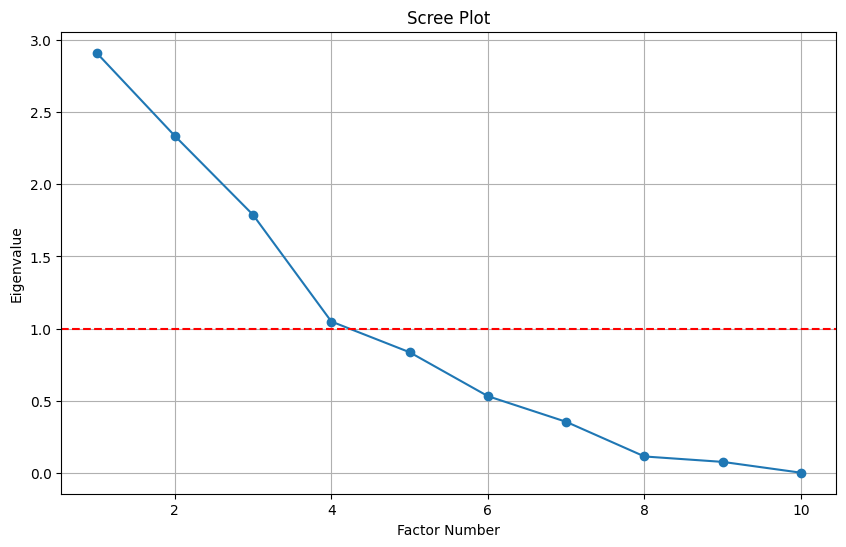

Number of factors selected: 4


In [64]:
# 计算特征值
fa = FactorAnalyzer(rotation=None, use_smc=True)
fa.fit(data_scaled)
ev, _ = fa.get_eigenvalues()

# 绘制碎石图
plt.figure(figsize=(10,6))
plt.plot(range(1, data_scaled.shape[1]+1), ev, marker='o')
plt.title('Scree Plot')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid()
plt.show()

# 选择特征值大于1的因子数量
n_factors = sum(ev > 1)
print(f"Number of factors selected: {n_factors}")

In [65]:
# 使用方差最大旋转进行因子分析
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax', method='principal')
fa.fit(data_scaled)

# 输出因子载荷矩阵
loadings = fa.loadings_
loadings_df = pd.DataFrame(loadings, index=data.columns, 
                           columns=[f'Factor{i+1}' for i in range(n_factors)])
print("因子载荷矩阵：")
print(loadings_df)

因子载荷矩阵：
      Factor1   Factor2   Factor3   Factor4
X1   0.262664 -0.003822  0.316723  0.709901
X2   0.837835 -0.195928  0.054248  0.082945
X3   0.059453  0.065095  0.940866 -0.173226
X4   0.835674  0.102174 -0.110888  0.168489
X5  -0.100470  0.921380 -0.061634  0.322710
X6   0.887432 -0.171895  0.140258 -0.015870
X7   0.007597  0.302282 -0.266599  0.829896
X8  -0.115215  0.954883  0.060834 -0.000966
X9   0.506768  0.170647  0.676545  0.131938
X10  0.299954  0.324341 -0.634087 -0.216323


In [68]:
# 计算因子得分
factor_scores = fa.transform(data_scaled)
factor_scores_df = pd.DataFrame(factor_scores, 
                                columns=[f'Factor{i+1}' for i in range(n_factors)])
print("因子得分示例：")
print(factor_scores_df.head())

因子得分示例：
    Factor1   Factor2   Factor3   Factor4
0  0.525084  1.264758 -0.174166  1.292298
1  1.604023 -0.433805  0.848647  0.417454
2  1.858808  0.972236 -0.016122  0.570875
3 -1.723566  0.549524 -0.667712  0.830524
4  1.912709 -0.970614  0.004799  0.935989
